Assignment 3 - CLIM 680 - Rachel Gaal
Composite of NAO Index in relation to monthly precip

In [25]:
import pandas as pd
import xarray as xr
from numpy import *
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)

In [3]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
clim_index=df.T.unstack().values
ds_index=xr.DataArray(clim_index,coords={'time':dates},dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')

In [4]:
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) object nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

In [6]:
file='/shared/obs/gridded/GPCP/monthly/precip.mon.mean.nc'
ds_precip=xr.open_dataset(file)
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 496)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:  

In [7]:
ds_climo=ds_precip.groupby('time.month').mean()
ds_anoms=ds_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2, time: 496)
Coordinates:
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 6 7 8 9 10 11 12 1 2 3 4
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 -0.021431686 -0.030803572 ... 0.018909812

In [8]:
ds_index=ds_index.sel(time=slice(ds_precip['time'][0],ds_precip['time'][-1]))
ds_index['nao']

<xarray.DataArray 'nao' (time: 496)>
array(['-2.12', '-1.20', '0.41', -2.01, -0.9, 1.92, 0.86, 1.11, 1.13,
       0.18, 0.42, 0.84, '-1.38', '-0.39', '-0.73', 1.26, -1.34, -0.07,
       -0.39, -3.01, 0.79, -1.41, -0.52, 0.63, '-0.08', '0.60', '-1.65',
       0.25, 0.24, -0.15, 0.08, 0.38, -1.27, -0.96, -0.53, -0.11, '-1.55',
       '0.86', '0.80', -0.04, -0.44, -1.34, 1.18, 0.21, 1.86, -0.29, 1.55,
       1.56, '1.34', '-1.04', '0.59', -1.07, -0.01, 1.31, 1.22, 1.95,
       -0.95, 1.22, -1.16, 0.18, '1.42', '0.37', '-0.79', -0.45, 0.55,
       -0.12, -0.04, 1.35, 0.31, 0.43, -0.2, -0.09, '-2.38', '-1.00',
       '-0.19', 0.2, -0.4, -0.5, 1.25, -0.74, -0.36, 1.49, -0.84, 0.11,
       '0.78', '-1.58', '1.39', -0.79, 0.84, 1.54, 0.15, -1.53, -0.95,
       2.2, 2.27, 0.83, '-1.85', '-1.27', '-0.26', 2.03, 0.96, -1.53,
       0.55, -1.19, -1.04, 0.66, 0.06, 0.21, '0.68', '0.42', '-0.58',
       -1.42, 0.64, 1.19, -0.32, -0.07, -0.82, -0.66, -0.49, 0.48, '0.85',
       '1.82', '1.54', 0.16, 

In [30]:
naos = ds_index['nao'].astype(float)
naos

<xarray.DataArray 'nao' (time: 496)>
array([-2.12, -1.2 ,  0.41, -2.01, -0.9 ,  1.92,  0.86,  1.11,  1.13,
        0.18,  0.42,  0.84, -1.38, -0.39, -0.73,  1.26, -1.34, -0.07,
       -0.39, -3.01,  0.79, -1.41, -0.52,  0.63, -0.08,  0.6 , -1.65,
        0.25,  0.24, -0.15,  0.08,  0.38, -1.27, -0.96, -0.53, -0.11,
       -1.55,  0.86,  0.8 , -0.04, -0.44, -1.34,  1.18,  0.21,  1.86,
       -0.29,  1.55,  1.56,  1.34, -1.04,  0.59, -1.07, -0.01,  1.31,
        1.22,  1.95, -0.95,  1.22, -1.16,  0.18,  1.42,  0.37, -0.79,
       -0.45,  0.55, -0.12, -0.04,  1.35,  0.31,  0.43, -0.2 , -0.09,
       -2.38, -1.  , -0.19,  0.2 , -0.4 , -0.5 ,  1.25, -0.74, -0.36,
        1.49, -0.84,  0.11,  0.78, -1.58,  1.39, -0.79,  0.84,  1.54,
        0.15, -1.53, -0.95,  2.2 ,  2.27,  0.83, -1.85, -1.27, -0.26,
        2.03,  0.96, -1.53,  0.55, -1.19, -1.04,  0.66,  0.06,  0.21,
        0.68,  0.42, -0.58, -1.42,  0.64,  1.19, -0.32, -0.07, -0.82,
       -0.66, -0.49,  0.48,  0.85,  1.82,  1.54,  0.1

In [31]:
nao_pos=naos.where(naos>=0)
nao_neg=naos.where(naos<0)

In [32]:
naopos_precip=ds_anoms.sel(time=nao_pos.dropna(dim='time')['time']).mean(dim='time')
naoneg_precip=ds_anoms.sel(time=nao_neg.dropna(dim='time')['time']).mean(dim='time')

comp_precip=[naopos_precip,naoneg_precip]
print(comp_precip)

[<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 -0.002982093 -0.00041600497 ... 0.015124494, <xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 0.003393

Text(0.5, 0.98, 'Composite Precipitation Anomalies and NAO Index')

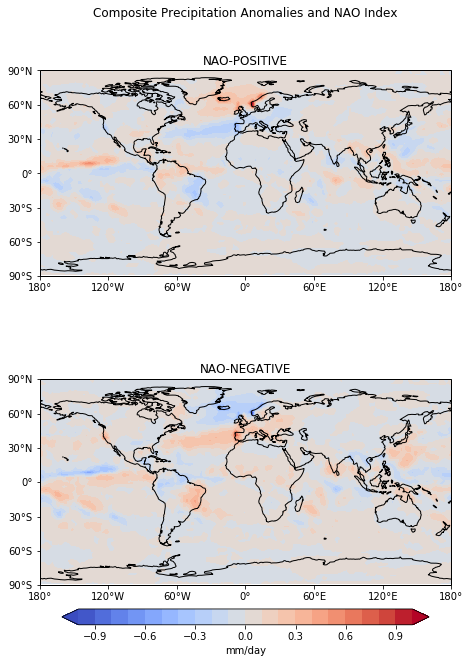

In [35]:
labels=['NAO-POSITIVE','NAO-NEGATIVE']
clevs=arange(-1,1.1,0.1)

# Define the figure and each axis
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,nao in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]['precip']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies and NAO Index')